In [1]:
import os
import re
import tqdm
import string
import pandas as pd
import numpy as np
import util
from sklearn.decomposition import TruncatedSVD
#from data_preprocessing import *
import word_embedding_load as wel
import baseline_classification as bc
import matplotlib.pyplot as plt

TabError: inconsistent use of tabs and spaces in indentation (util.py, line 44)

In [2]:
[all_data, train_size, test_size, train_x, train_y, test_x] = util.loadData()
sentences = util.data_preprocess(all_data)

NameError: name 'util' is not defined

In [3]:
param = util.Doc2VecParam(1, 5, 200, 1e-4, 5, 4, 30, 1)
filename='../model/doc2vec/docEmbeddings_30_load_all.d2v'

In [4]:
text_model = wel.getTextModel(sentences, param, filename)

Loading model...
successfully loaded the textmodel from ../model/doc2vec/docEmbeddings_30_load_all.d2v


In [5]:
GENE_INPUT_DIM = 25
TEXT_INPUT_DIM = 200
svd = TruncatedSVD(n_components=GENE_INPUT_DIM, random_state=12)

In [6]:
truncated_one_hot_gene = wel.getGeneVec(all_data, svd)
truncated_one_hot_variation = wel.getVariationVec(all_data, svd)
text_train_arrays, text_test_arrays = wel.getTextVec(text_model, train_size, test_size, TEXT_INPUT_DIM)
train_set = np.hstack((truncated_one_hot_gene[:train_size], truncated_one_hot_variation[:train_size], text_train_arrays))
test_set = np.hstack((truncated_one_hot_gene[train_size:], truncated_one_hot_variation[train_size:], text_test_arrays))
encoded_y = pd.get_dummies(train_y)
encoded_y = np.array(encoded_y)

In [7]:
X = np.array(train_set)
y = np.array(bc.getLabels(encoded_y))

Accuracy: 0.6110 ± 0.0214
NMI: 0.3925 ± 0.0274
Log_loss: 6.5794 ± 0.5453
Normalized confusion matrix
[[ 0.60725076  0.02719033  0.01057402  0.23111782  0.06646526  0.03172205
   0.02416918  0.00151057  0.        ]
 [ 0.07028112  0.49799197  0.01204819  0.03413655  0.01807229  0.02008032
   0.34738956  0.          0.        ]
 [ 0.09375     0.03125     0.38541667  0.19791667  0.04166667  0.          0.25
   0.          0.        ]
 [ 0.23169108  0.02130493  0.01065246  0.67376831  0.03195739  0.00532623
   0.02396804  0.          0.00133156]
 [ 0.2659176   0.05617978  0.02996255  0.12734082  0.35955056  0.0411985
   0.11985019  0.          0.        ]
 [ 0.14478114  0.1010101   0.00673401  0.05050505  0.03367003  0.58922559
   0.07070707  0.003367    0.        ]
 [ 0.04933586  0.16034156  0.03225806  0.01802657  0.01612903  0.00664137
   0.71347249  0.          0.00379507]
 [ 0.14285714  0.23809524  0.          0.04761905  0.          0.
   0.14285714  0.19047619  0.23809524]
 [ 0.09302

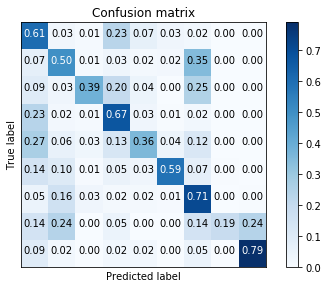

In [8]:
cm = bc.baseline(X, y)

In [ ]:
# TODO:
'''
1, Different length of representation (SVD, for each part?), call api and get results
2, 

'''